# Natural Language Processing with Disaster Tweets

#### Course Title: Machine Learning (CSC 4850/6850)
#### Group Members:
- Fiyinfoluwa Dideoluwa (002828214)
- Ekene Okeke (002847245)
- Josh Daisy (002775471)



## Objective


Social media has become an important communication channel for staying up to date on critical events such as disasters. However; the sheer magnitude and diversity of posts it is hard to tell what is real. Platforms like Twitter, Instagram, and Facebook play crucial roles in circulating both essential and distracting information during disasters. Accurate classification of such information can help streamline emergency response efforts. This project utilizes three labeled datasets of tweets to build and evaluate effective models capable of performing this classification task. 


## Steps:
1. **Exploratory Data Analysis**
2. **Data Preprocessing**
4. **Evaluation of Machine Learning models for classifying Tweets data**
    - CNN
    - BERT
    - LSTM
5. **Analysis and Discussion**

In [40]:
# install necessary Libraries
!pip install --upgrade scikit-learn
!pip install tensorflow
!pip install nltk
!pip install wordcloud
!pip install chart-studio
!pip install cufflinks
!pip install keras
!pip install sentence-transformers
!pip install torch
!pip install transformers


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5a/4d/bf95fd2ba2034b515c5ed8932ae990d626b90fb7f94d5fde36134a67ac09/tensorflow-2.19.0-cp39-cp39-win_amd64.whl.metadata
  Using cached tensorflow-2.19.0-cp39-cp39-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp39-cp39-win_amd64.whl (375.7 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Kanyin AKinwande\\Documents\\FIYIN\\GSU\\Spring 2025\\ADV IMAGE PROCESSING\\PROJECT\\pythonProject\\.venv\\Lib\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\tsi\\alts\\zero_copy_frame_protector\\alts_grpc_integrity_only_record_protocol.h'


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import the required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from nltk.corpus import stopwords
from plotly.subplots import make_subplots
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud,STOPWORDS
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import nltk
nltk.download ('stopwords')
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns


[nltk_data] Downloading package stopwords to C:\Users\Kanyin
[nltk_data]     AKinwande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 1. Data Exploration

In [4]:
# Load the datasets
df_1 = pd.read_csv('Raw_Dataset_1.csv')
df_2 = pd.read_csv('Raw_Dataset_2.csv')
df_3 = pd.read_csv('Raw_Dataset_3.csv')

### A. Explore the structure of the dataset

In [5]:
# view the first 10 records of the datasets
print("Dataset 1:")
display(df_1.head(10))

print("\nDataset 2:")
display(df_2.head(10))

print("\nDataset 3:")
display(df_3.head(10))


Dataset 1:


id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
5   8     NaN      NaN  #RockyFire Update => California Hwy. 20 closed...   
6  10     NaN      NaN  #flood #disaster Heavy rain causes flash flood...   
7  13     NaN      NaN  I'm on top of the hill and I can see a fire in...   
8  14     NaN      NaN  There's an emergency evacuation happening now ...   
9  15     NaN      NaN  I'm afraid that the tornado is coming to our a...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1


Dataset 2:


num                                               text     timestamp  \
0    0  RT @uberdogfound: Please RT - Food needed for ...  40657.975000   
1    1  Please RT - Food needed for shelter in NC in a...  40657.975000   
2    3  ‚ô°its raining and tornado warnings....about t...  40657.897917   
3    9  Lmao #damn RT @LuCeCaNNoNn: If I don't get any...  40657.766667   
4   10  Saved by the tornado warning....I'm just ready...  40657.756250   
5   12  uh...no more food please Mr. @mlp_spike ..my t...  40657.657639   
6   14  We'll be accepting donations of food to be dis...  40657.591667   
7   15  Go, See, Do: At the game, Lowes Foods will be ...  40657.241667   
8   16  Tornado steals fast food: \r\n\t\t\t\t\t\t\t\t...  40657.222222   
9   17  Raleigh neighbors reach out to tornado victims...  40657.181250   

   target  
0       1  
1       1  
2       1  
3       1  
4       0  
5       1  
6       0  
7       0  
8       1  
9       0


Dataset 3:


id keyword         location  \
0   0  ablaze              NaN   
1   1  ablaze              NaN   
2   2  ablaze    New York City   
3   3  ablaze   Morgantown, WV   
4   4  ablaze              NaN   
5   5  ablaze               OC   
6   6  ablaze  London, England   
7   7  ablaze           Bharat   
8   8  ablaze     Accra, Ghana   
9   9  ablaze        Searching   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  
5  If this child was Chinese, this tweet would ha...       0  
6  Several houses have been set ablaze in Ngemsib...       1  
7  Asansol: A BJP office in Salanpur village was ...       1  
8  National Security Minister, Kan Dapaah's side ...       0  
9  This creature who’s soul is no longer clarent ...       0

In [6]:
# display concise summarization of the features in each dataset
print("Dataset 1 Info:")
df_1.info()
print("\nDataset 2 Info:")
df_2.info()
print("\nDataset 3 Info:")
df_3.info()


Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB

Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        3572 non-null   int64  
 1   text       3572 non-null   object 
 2   timestamp  3572 non-null   float64
 3   target     3572 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 111.8+ KB

Dataset 3 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Col

In [7]:
# generate descriptive statistics of the data in each dataset
print("Dataset 1 Summary Statistics:")
df_1.describe()
print("\nDataset 2 Summary Statistics:")
df_2.describe()
print("\nDataset 3 Summary Statistics:")
df_3.describe()


Dataset 1 Summary Statistics:


id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


Dataset 2 Summary Statistics:


num     timestamp       target
count  3572.000000   3572.000000  3572.000000
mean   1429.500000  40659.836897     0.704367
std    1007.660085      2.891705     0.456391
min       0.000000  40653.009722     0.000000
25%     572.750000  40658.934375     0.000000
50%    1295.500000  40660.924306     1.000000
75%    2070.000000  40661.346528     1.000000
max    3739.000000  40664.993056     1.000000


Dataset 3 Summary Statistics:


id        target
count  11370.000000  11370.000000
mean    5684.500000      0.185928
std     3282.380615      0.389066
min        0.000000      0.000000
25%     2842.250000      0.000000
50%     5684.500000      0.000000
75%     8526.750000      0.000000
max    11369.000000      1.000000

### B. Check for Missing Data

In [8]:
def check_missing_values(datasets, dataset_names):
    """Check missing values for multiple datasets and display a report."""
    print("\nMissing Values Report for All Datasets:\n")
    
    for i, df in enumerate(datasets):
        print(f"🔹 {dataset_names[i]}:")
        
        # Calculate missing values and percentages
        missing_values = df.isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        
        # Create a DataFrame for missing values
        missing_report = pd.DataFrame({
            'Missing Values': missing_values,
            'Percentage (%)': missing_percentage
        })
        
        # Display only columns with missing values
        display(missing_report[missing_report['Missing Values'] > 0])
        
        print("-" * 50)  # Separator for readability

# List of datasets and corresponding names
datasets = [df_1, df_2, df_3]
dataset_names = ["Dataset 1", "Dataset 2", "Dataset 3"]

# Call the function
check_missing_values(datasets, dataset_names)



Missing Values Report for All Datasets:

🔹 Dataset 1:


Missing Values  Percentage (%)
keyword               61        0.801261
location            2533       33.272035

--------------------------------------------------
🔹 Dataset 2:


Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []

--------------------------------------------------
🔹 Dataset 3:


Missing Values  Percentage (%)
location            3418       30.061566

--------------------------------------------------


### C. Feature Engineering

#### We do not need the 'location' and 'id' features in 'dataset 1' and dataset 3'. We also don't need the 'timestamp' and 'num' features in 'dataset 2', so we drop them

In [9]:
#drop 'location'
cleaned_df_1 = df_1.drop(columns=['location', 'id'])
cleaned_df_2 = df_2.drop(columns=['timestamp', 'num'])
cleaned_df_3 = df_3.drop(columns=['location', 'id'])


#### Since the percentage of missing values in the 'keywords' column is very minimal (<1%), we will handle this by deleting the records that contain these null values.

In [10]:
# Drop rows where 'keyword' has null values in dataset 1
cleaned_df_1 = cleaned_df_1.dropna(subset=['keyword'])

In [11]:
# confirm there are no missing values
# List of cleaned datasets and their names
cleaned_datasets = [cleaned_df_1, cleaned_df_2, cleaned_df_3]
cleaned_dataset_names = ["Cleaned Dataset 1", "Cleaned Dataset 2", "Cleaned Dataset 3"]

# Function to check missing values in the cleaned datasets
check_missing_values(cleaned_datasets, cleaned_dataset_names)


Missing Values Report for All Datasets:

🔹 Cleaned Dataset 1:


Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []

--------------------------------------------------
🔹 Cleaned Dataset 2:


Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []

--------------------------------------------------
🔹 Cleaned Dataset 3:


Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []

--------------------------------------------------


### D. Visualize the Distribution of the Dataset

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Distribution for df_1')

Text(0.5, 0, 'Target Value')

Text(0, 0.5, 'Count')

[Text(0, 0, '0'), Text(1, 0, '1')]

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Distribution for df_2')

Text(0.5, 0, 'Target Value')

Text(0, 0.5, 'Count')

[Text(0, 0, '0'), Text(1, 0, '1')]

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Distribution for df_3')

Text(0.5, 0, 'Target Value')

Text(0, 0.5, 'Count')

[Text(0, 0, '0'), Text(1, 0, '1')]

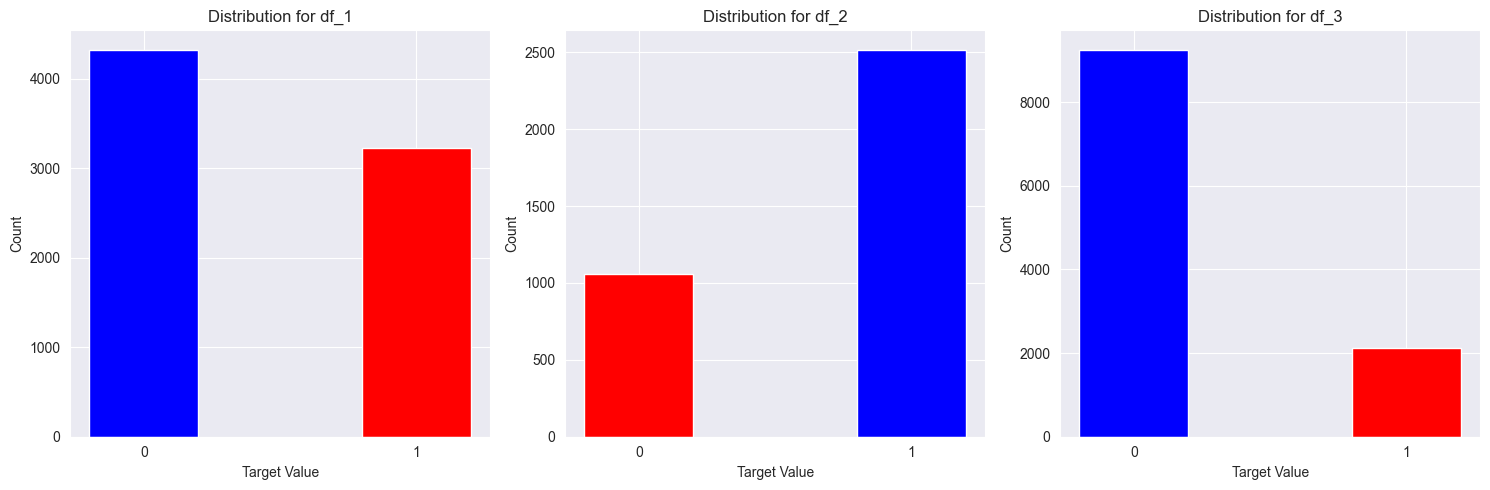

In [12]:

# Create a list of the datasets
datasets = [cleaned_df_1, cleaned_df_2, cleaned_df_3]
dataset_labels = ['df_1', 'df_2', 'df_3']

# Set up the subplots (3 separate charts)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each dataset and plot separately
for i, (df, ax) in enumerate(zip(datasets, axes)):
    target_counts = df['target'].value_counts()  # Count the values of 1 and 0
    ax.bar(target_counts.index, target_counts.values, width=0.4, color=['blue', 'red'])
    ax.set_title(f'Distribution for {dataset_labels[i]}')
    ax.set_xlabel('Target Value')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['0', '1'])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


#### The plot shows our dataset is quite imbalanced, where:
Target = 1, represents disaster tweets, and
Target = 2, represents non-disaster tweets


### E. Visualize length of tweets 

#### - Length of characters


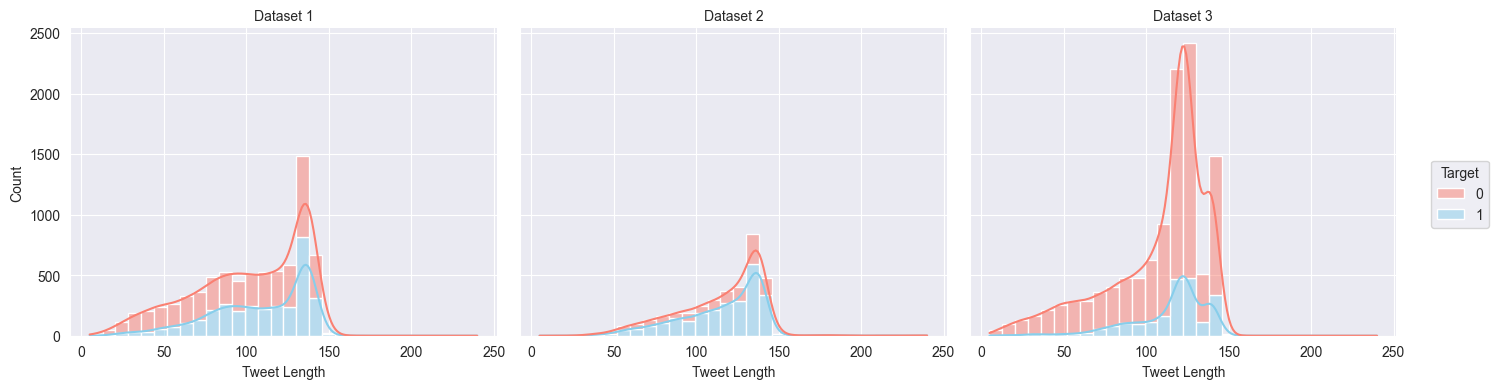

In [13]:
# Visualize the length of the characters for each tweet in the dataset

# Example: assuming df1, df2, df3 are your datasets
cleaned_df_1['dataset'] = 'Dataset 1'
cleaned_df_2['dataset'] = 'Dataset 2'
cleaned_df_3['dataset'] = 'Dataset 3'

# Combine all into one DataFrame
df_all = pd.concat([cleaned_df_1, cleaned_df_2, cleaned_df_3], ignore_index=True)

# Create tweet length column
df_all['tweet_length'] = df_all['text'].apply(len)

g = sns.displot(
    data=df_all, x='tweet_length', hue='target',
    col='dataset', bins=30, kde=True, height=4, aspect=1.2,
    palette={0: 'salmon', 1: 'skyblue'}, multiple='stack'
)
g.set_titles("{col_name}")
g.set_axis_labels("Tweet Length", "Count")
g._legend.set_title("Target")
g._legend.set_frame_on(True)



#### - Length of words

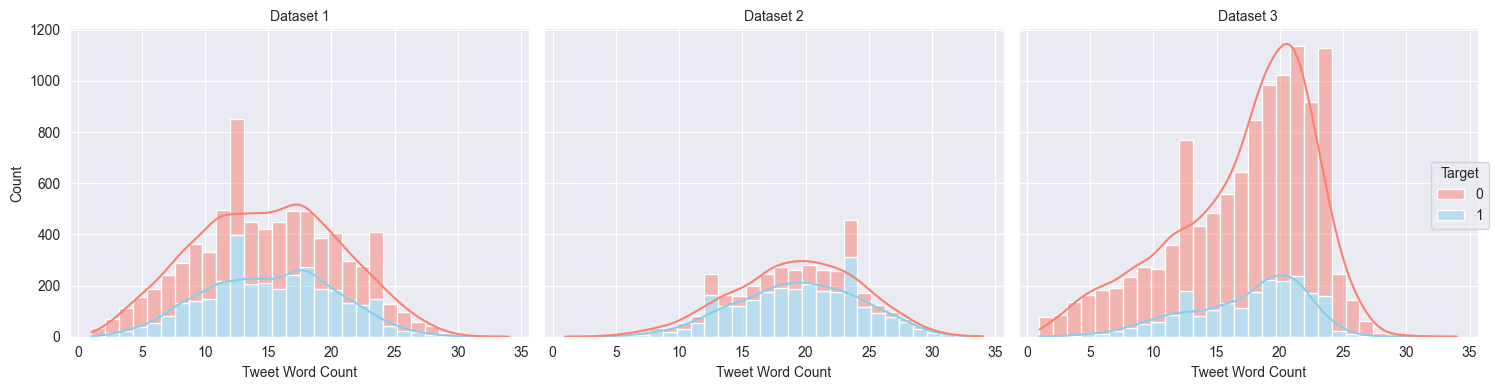

In [14]:
# Visualize the length of the words for each tweet in the dataset

# Label datasets
cleaned_df_1['dataset'] = 'Dataset 1'
cleaned_df_2['dataset'] = 'Dataset 2'
cleaned_df_3['dataset'] = 'Dataset 3'

# Combine into one DataFrame
df_all = pd.concat([cleaned_df_1, cleaned_df_2, cleaned_df_3], ignore_index=True)

# Compute tweet length in number of words
df_all['tweet_length'] = df_all['text'].str.split().apply(len)

# Create the plot
g = sns.displot(
    data=df_all, x='tweet_length', hue='target',
    col='dataset', bins=30, kde=True, height=4, aspect=1.2,
    palette={0: 'salmon', 1: 'skyblue'}, multiple='stack'
)

# Customize plot labels and legend
g.set_titles("{col_name}")
g.set_axis_labels("Tweet Word Count", "Count")
g._legend.set_title("Target")
g._legend.set_frame_on(True)
plt.tight_layout()


#### The plots have the shape of a normal distribution. From the plot we can say that the number of words in the tweets ranges from 2 to 30 in both cases

### F. Visualize average word lengths of tweets

<Axes: xlabel='text', ylabel='Density'>

<Axes: xlabel='text', ylabel='Density'>

Text(0.5, 1.0, 'Average Word Length Distribution - Dataset 1')

Text(0.5, 0, 'Average Word Length')

Text(0, 0.5, 'Density')

<Axes: xlabel='text', ylabel='Density'>

<Axes: xlabel='text', ylabel='Density'>

Text(0.5, 1.0, 'Average Word Length Distribution - Dataset 2')

Text(0.5, 0, 'Average Word Length')

Text(0, 0.5, 'Density')

<Axes: xlabel='text', ylabel='Density'>

<Axes: xlabel='text', ylabel='Density'>

Text(0.5, 1.0, 'Average Word Length Distribution - Dataset 3')

Text(0.5, 0, 'Average Word Length')

Text(0, 0.5, 'Density')

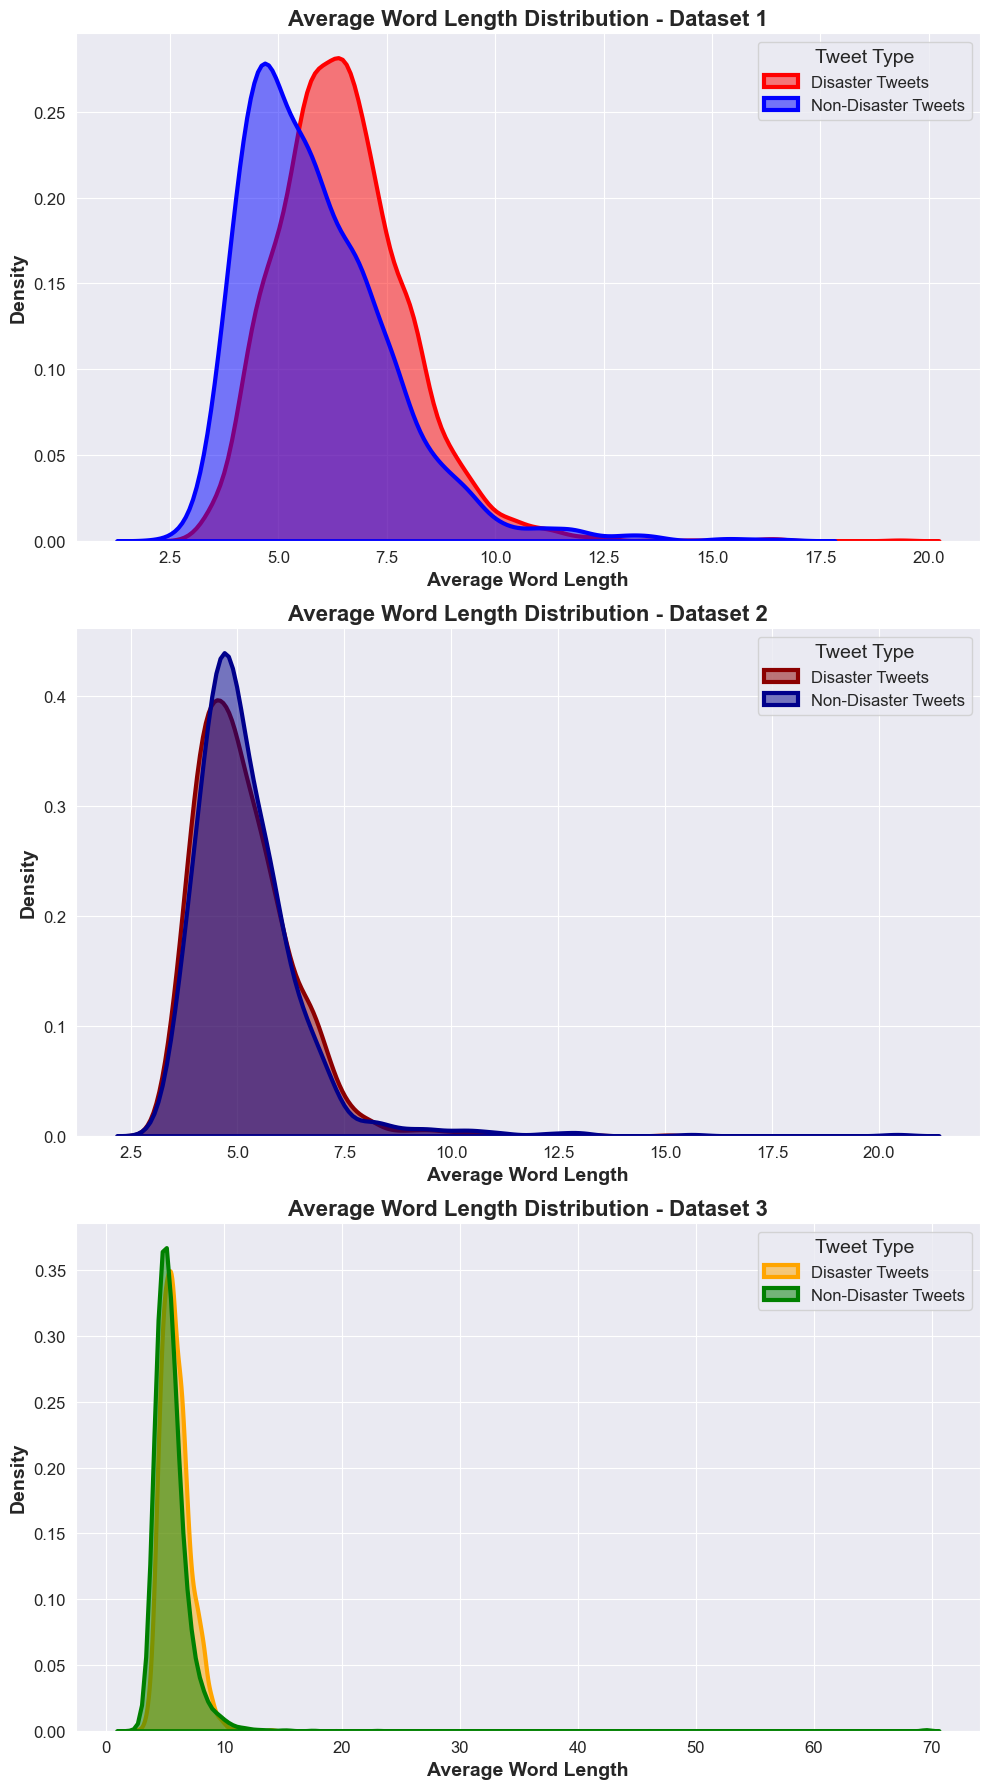

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute average word length
def avgwordlen(strlist):
    return [len(word) for word in strlist]

# Compute average word length for each dataset
datasets = [cleaned_df_1, cleaned_df_2, cleaned_df_3]
titles = ["Dataset 1", "Dataset 2", "Dataset 3"]
colors = [['red', 'blue'], ['darkred', 'darkblue'], ['orange', 'green']]

# Set up the figure for plotting with subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column

for i, (df, ax) in enumerate(zip(datasets, axes)):
    # Compute the average word length for Disaster and Non-Disaster tweets
    avgword_len_dis = df[df['target'] == 1]['text'].str.split().apply(avgwordlen).map(np.mean)
    avgword_len_non_dis = df[df['target'] == 0]['text'].str.split().apply(avgwordlen).map(np.mean)

    # Plot KDE for Disaster and Non-Disaster Tweets with bolder lines
    sns.kdeplot(avgword_len_dis, color=colors[i][0], label=f"Disaster Tweets", shade=True, alpha=0.5, ax=ax, linewidth=3)
    sns.kdeplot(avgword_len_non_dis, color=colors[i][1], label=f"Non-Disaster Tweets", shade=True, alpha=0.5, ax=ax, linewidth=3)
    
    # Set titles and labels for each subplot with larger font
    ax.set_title(f"Average Word Length Distribution - {titles[i]}", fontsize=16, weight='bold')
    ax.set_xlabel("Average Word Length", fontsize=14, weight='bold')
    ax.set_ylabel("Density", fontsize=14, weight='bold')
    
    # Adjust legend to be more prominent
    ax.legend(title="Tweet Type", fontsize=12, title_fontsize=14, loc='upper right')

    # Make the axes thicker and bolder
    ax.tick_params(axis='both', which='major', labelsize=12, width=2)
    ax.tick_params(axis='both', which='minor', width=1)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### The average word counts for real disaster tweets are found to be in the range(5-7.5)while for fake disaster tweets are in the range of (4-6)

### G. Visualize most common stop words in the text data

#### What is a corpus?
A corpus, which means "body" in Latin, is a group of writings used in linguistics and natural language processing.
These collections can consist of texts in one language or a variety of languages.


#### What are stop words?
Stop words are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information.

[nltk_data] Downloading package stopwords to C:\Users\Kanyin
[nltk_data]     AKinwande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Most Common Stop Words - Dataset 1')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Stop Word')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Most Common Stop Words - Dataset 2')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Stop Word')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Most Common Stop Words - Dataset 3')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Stop Word')

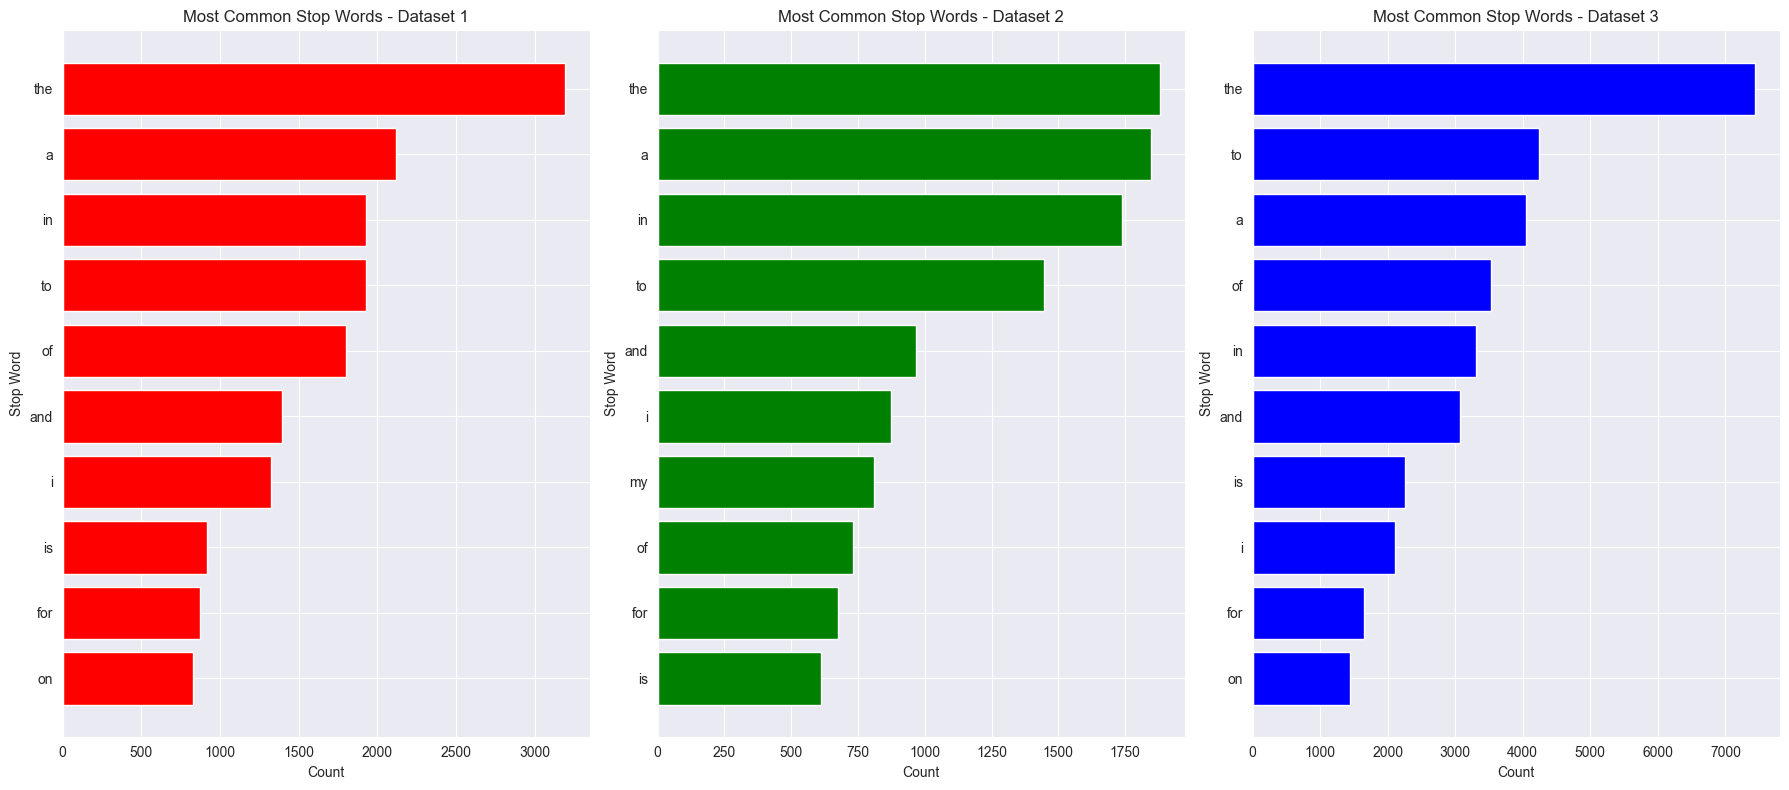

In [16]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter

# Download stop words if not already downloaded
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to get the most common stop words in a dataset
def get_common_stop_words(df):
    # Tokenize text and filter stop words
    words = df['text'].str.split().sum()  # Combine all words in the dataset
    stop_words_in_text = [word.lower() for word in words if word.lower() in stop_words]
    stop_word_counts = Counter(stop_words_in_text)
    return stop_word_counts

# Compute common stop words for each dataset
stop_word_counts_1 = get_common_stop_words(cleaned_df_1)
stop_word_counts_2 = get_common_stop_words(cleaned_df_2)
stop_word_counts_3 = get_common_stop_words(cleaned_df_3)

# Get the most common stop words (top 10)
common_stop_words_1 = stop_word_counts_1.most_common(10)
common_stop_words_2 = stop_word_counts_2.most_common(10)
common_stop_words_3 = stop_word_counts_3.most_common(10)

# Prepare data for plotting
stop_words = ['Dataset 1', 'Dataset 2', 'Dataset 3']
stop_counts = [common_stop_words_1, common_stop_words_2, common_stop_words_3]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 8))  # Side-by-side charts

# Colors for each plot
colors = ['red', 'green', 'blue']

# Plot the most common stop words for each dataset
for i, (common_stop_words, color, ax) in enumerate(zip(stop_counts, colors, axes)):
    stop_words_list, counts_list = zip(*common_stop_words)
    
    ax.barh(stop_words_list, counts_list, color=color)
    ax.set_title(f"Most Common Stop Words - {stop_words[i]}")
    ax.set_xlabel('Count')
    ax.set_ylabel('Stop Word')
    ax.invert_yaxis()  # Highest count on top

# Layout adjustments
plt.tight_layout()

# Show the plot
plt.show()


### H. Visualize most common punctuations/ special characters in the text data

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Most Common Punctuations - Dataset 1')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Punctuation')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Most Common Punctuations - Dataset 2')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Punctuation')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Most Common Punctuations - Dataset 3')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Punctuation')

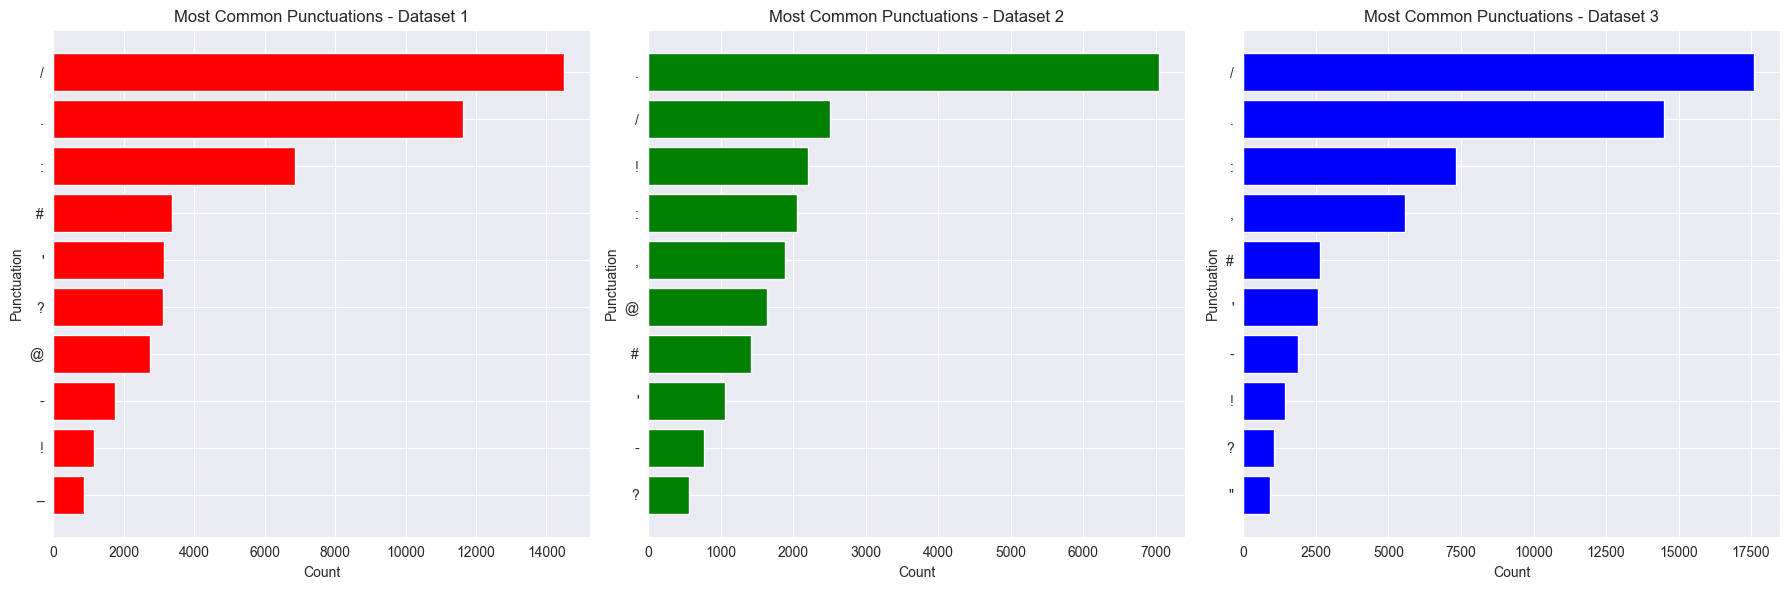

In [17]:
import string
import matplotlib.pyplot as plt
from collections import Counter

# Function to extract punctuation characters from text
def get_punctuation_counts(df):
    punctuation_marks = string.punctuation
    text = ' '.join(df['text'])
    punctuations = [char for char in text if char in punctuation_marks]
    punctuation_counts = Counter(punctuations)
    return punctuation_counts

# Compute punctuation counts for each dataset
punctuation_counts_1 = get_punctuation_counts(cleaned_df_1)
punctuation_counts_2 = get_punctuation_counts(cleaned_df_2)
punctuation_counts_3 = get_punctuation_counts(cleaned_df_3)

# Get the most common punctuation (top 10)
common_punctuations_1 = punctuation_counts_1.most_common(10)
common_punctuations_2 = punctuation_counts_2.most_common(10)
common_punctuations_3 = punctuation_counts_3.most_common(10)

# Prepare data for plotting
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3']
punctuation_counts = [common_punctuations_1, common_punctuations_2, common_punctuations_3]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for side-by-side bar charts

# Colors for each plot
colors = ['red', 'green', 'blue']

# Plot the most common punctuation for each dataset
for i, (common_punctuations, color, ax) in enumerate(zip(punctuation_counts, colors, axes)):
    punctuations_list, counts_list = zip(*common_punctuations)
    
    ax.barh(punctuations_list, counts_list, color=color)
    ax.set_title(f"Most Common Punctuations - {datasets[i]}")
    ax.set_xlabel('Count')
    ax.set_ylabel('Punctuation')
    ax.invert_yaxis()  # Highest count on top

# Layout adjustments
plt.tight_layout()
plt.show()


## Step 2. Data Preprocessing

### A. Remove unwanted text using regular expressions

#### What is stemming?
Stemming is a technique that removes prefixes and suffixes from words to return them to their fundamental or root form. The primary goal of stemming is to standardise and simplify words.

In [56]:
stemmer = SnowballStemmer("english")

def preprocess_data(data):
    
    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) 
    
    #decontraction
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    # Match all digits in the string and replace them by empty string
    text = re.sub(r'[0-9]', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    # filtering out miscellaneous text.
    text = re.sub('[^a-zA-Z]',' ',text) 
    text = re.sub(r"\([^()]*\)", "", text)
    # remove mentions
    text = re.sub('@\S+', '', text)  
    
    # remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)  
    

    # Lowering all the words in text
    text = text.lower()
    text = text.split()
    
    text = [stemmer.stem(words) for words in text if words not in stopwords.words('english')]
    
    # Removal of words with length<2
    text = [i for i in text if len(i)>2] 
    text = ' '.join(text)
    return text

cleaned_df_1["Cleaned_text"] = cleaned_df_1["text"].apply(preprocess_data)
cleaned_df_2["Cleaned_text"] = cleaned_df_2["text"].apply(preprocess_data)
cleaned_df_3["Cleaned_text"] = cleaned_df_3["text"].apply(preprocess_data)

### B. Further Data Exploration

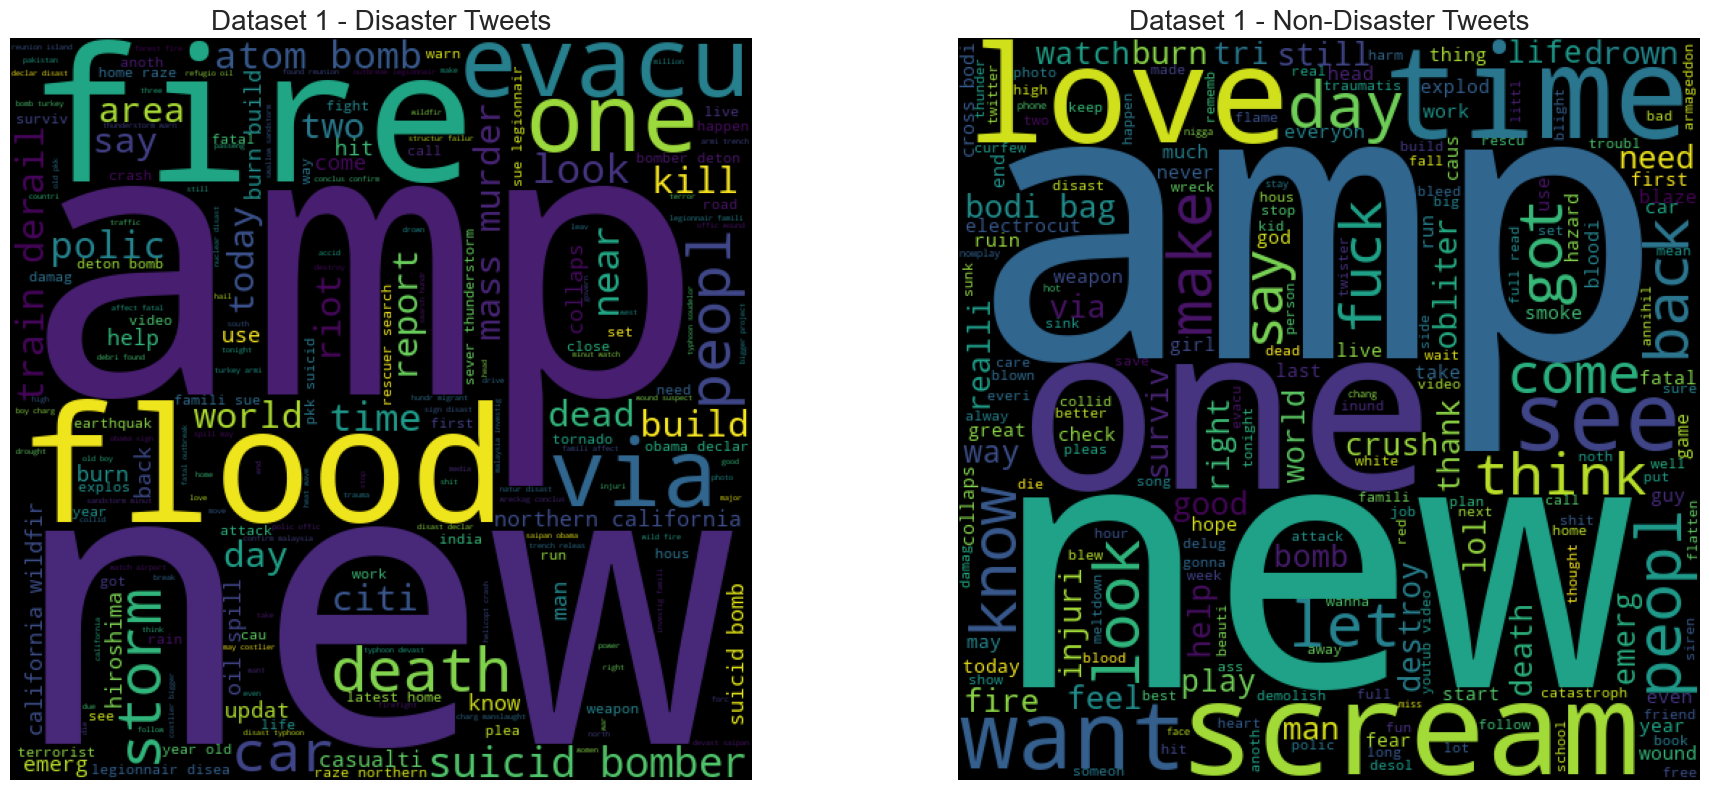

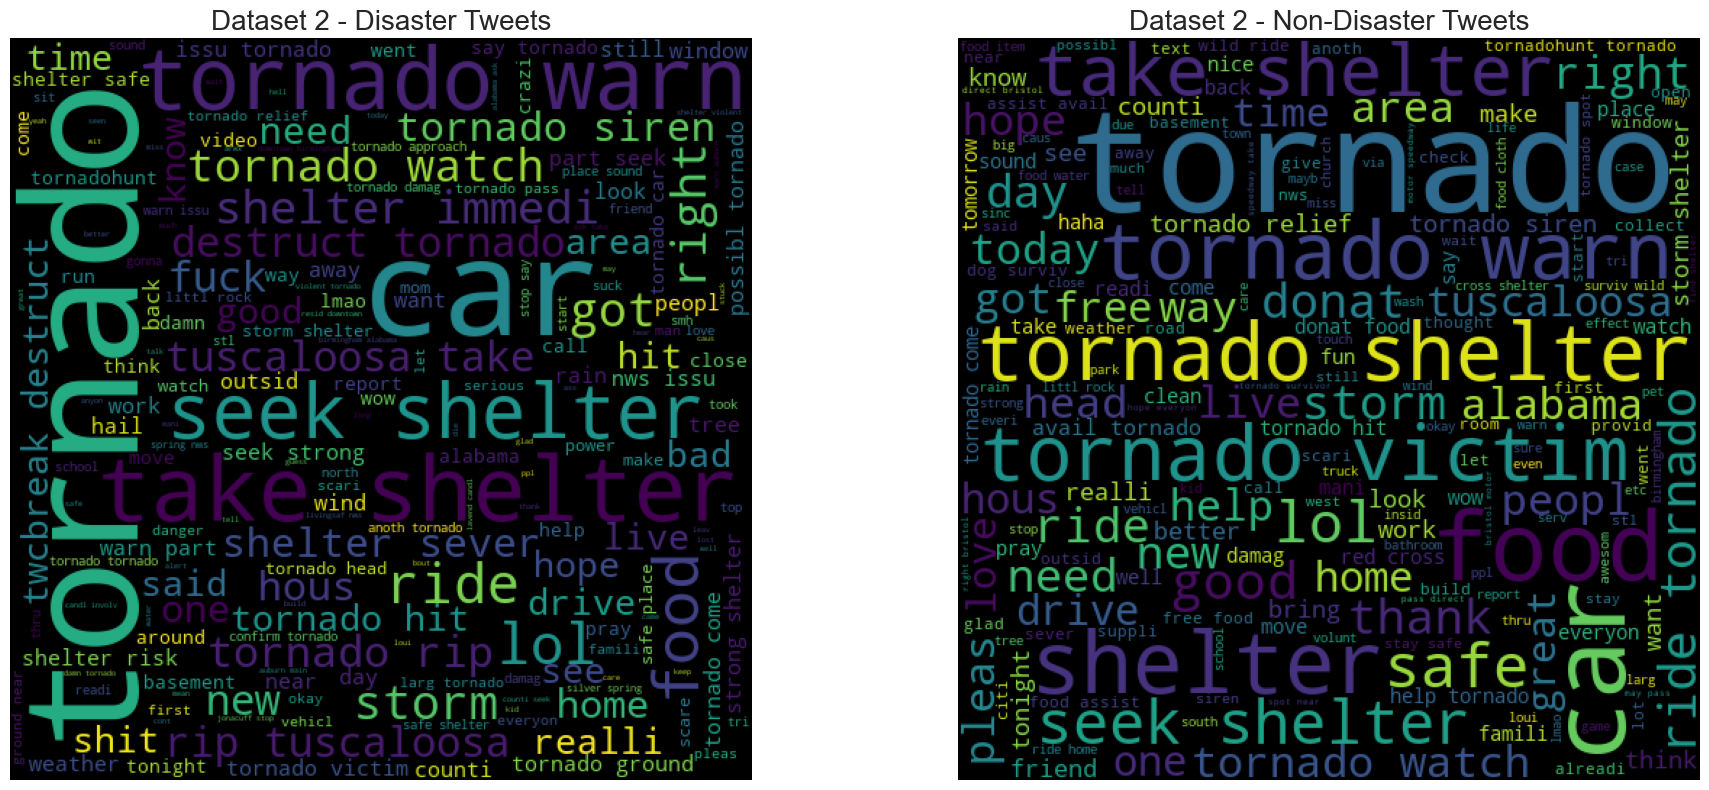

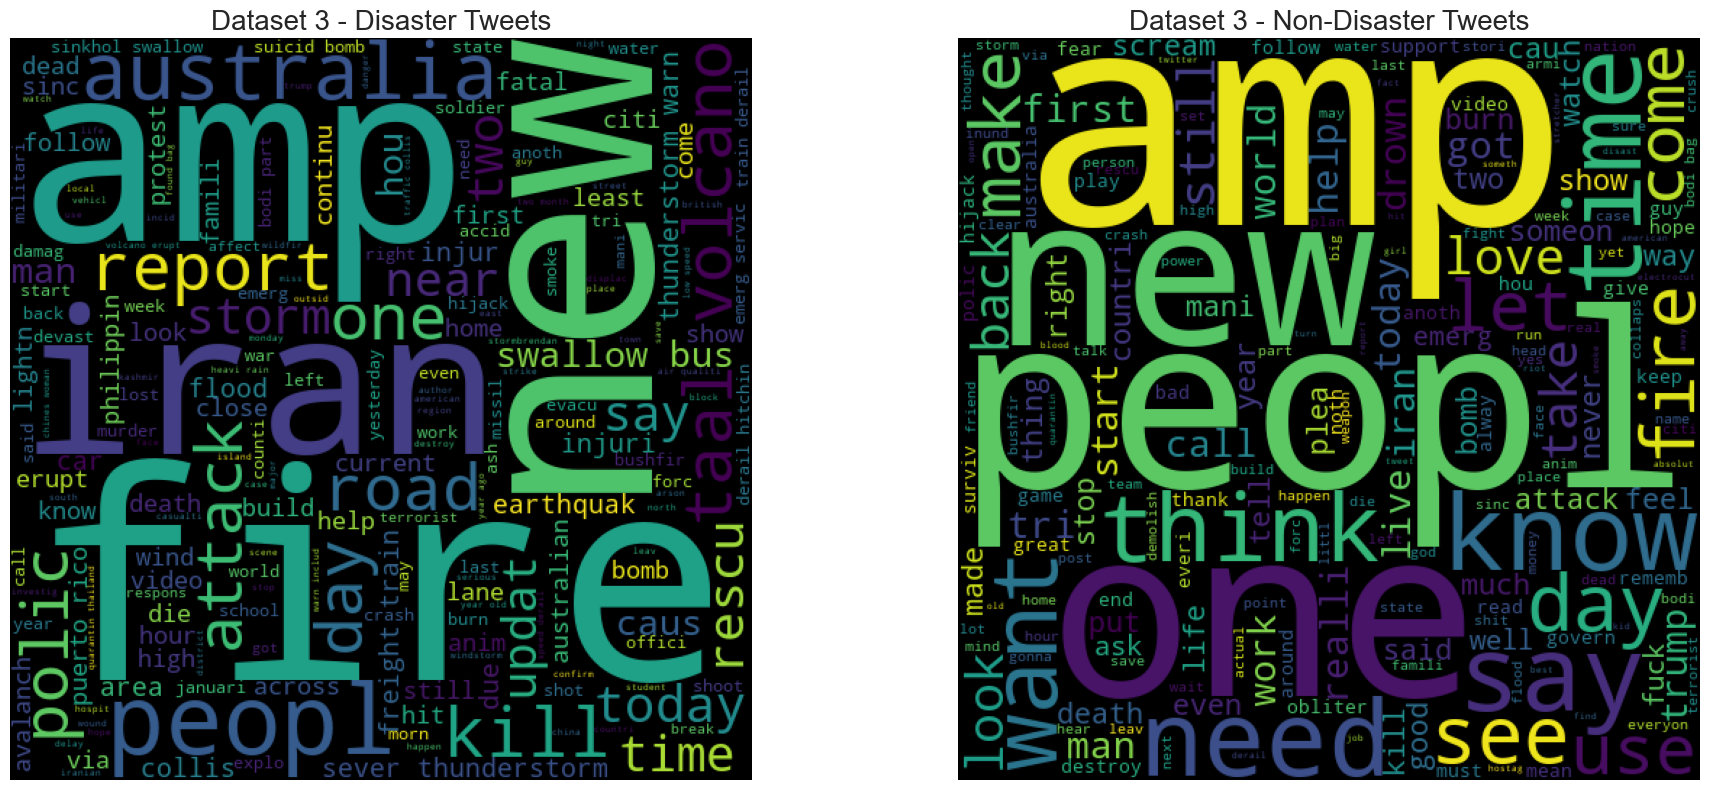

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Function to generate and display word cloud
def wordcloud(data, title, ax):
    words = ' '.join(data['Cleaned_text'].astype('str').tolist())  # Combine all text
    stopwords = set(STOPWORDS)  # Exclude common stopwords
    wc = WordCloud(stopwords=stopwords, width=512, height=512).generate(words)  # Generate word cloud
    ax.imshow(wc)  # Display word cloud on axis
    ax.axis('off')  # Hide axis
    ax.set_title(title, fontsize=20)  # Set title for the plot

# Filter datasets for disaster and non-disaster tweets
datasets = {
    "Dataset 1": {
        "disaster": cleaned_df_1[cleaned_df_1['target'] == 1],
        "non_disaster": cleaned_df_1[cleaned_df_1['target'] == 0]
    },
    "Dataset 2": {
        "disaster": cleaned_df_2[cleaned_df_2['target'] == 1],
        "non_disaster": cleaned_df_2[cleaned_df_2['target'] == 0]
    },
    "Dataset 3": {
        "disaster": cleaned_df_3[cleaned_df_3['target'] == 1],
        "non_disaster": cleaned_df_3[cleaned_df_3['target'] == 0]
    }
}

# Loop through each dataset and create separate plots
for dataset_name, data in datasets.items():
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns for each dataset
    
    # Generate word clouds for disaster and non-disaster tweets
    wordcloud(data['disaster'], f"{dataset_name} - Disaster Tweets", axes[0])
    wordcloud(data['non_disaster'], f"{dataset_name} - Non-Disaster Tweets", axes[1])
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


#### Our cleaned text still contains some unnecessary words (such as: like, amp, get, would etc.) that aren't relevant and can confuse our model, resulting in false prediction. Now, we will further remove some words with high frequency from text based on above charts.

In [58]:
# Common words to be removed
common_words = ['via', 'like', 'build', 'get', 'would', 'one', 'two', 'feel', 'lol', 'fuck', 'take', 'way', 
                'may', 'first', 'latest', 'want', 'make', 'back', 'see', 'know', 'let', 'look', 'come', 'got', 
                'still', 'say', 'think', 'great', 'pleas', 'amp', 'new', 'news', 'car']

# Function to clean the text by removing common words
def text_cleaning(data, remove_words):
    return ' '.join(i for i in data.split() if i not in remove_words)

# Function to apply text cleaning to the three datasets
def clean_datasets(datasets, common_words):
    for dataset in datasets:
        # Apply text cleaning to disaster tweets (target == 1) only
        dataset['Cleaned_text'] = dataset.apply(
            lambda row: text_cleaning(row['text'], common_words) if row['target'] == 1 else row['text'],
            axis=1
        )
    return datasets

# Define the datasets
datasets = [cleaned_df_1, cleaned_df_2, cleaned_df_3]

# Apply the cleaning function to each dataset
cleaned_datasets = clean_datasets(datasets, common_words)

# Now, the datasets (cleaned_df_1, cleaned_df_2, cleaned_df_3) will have their 'Cleaned_text' columns updated


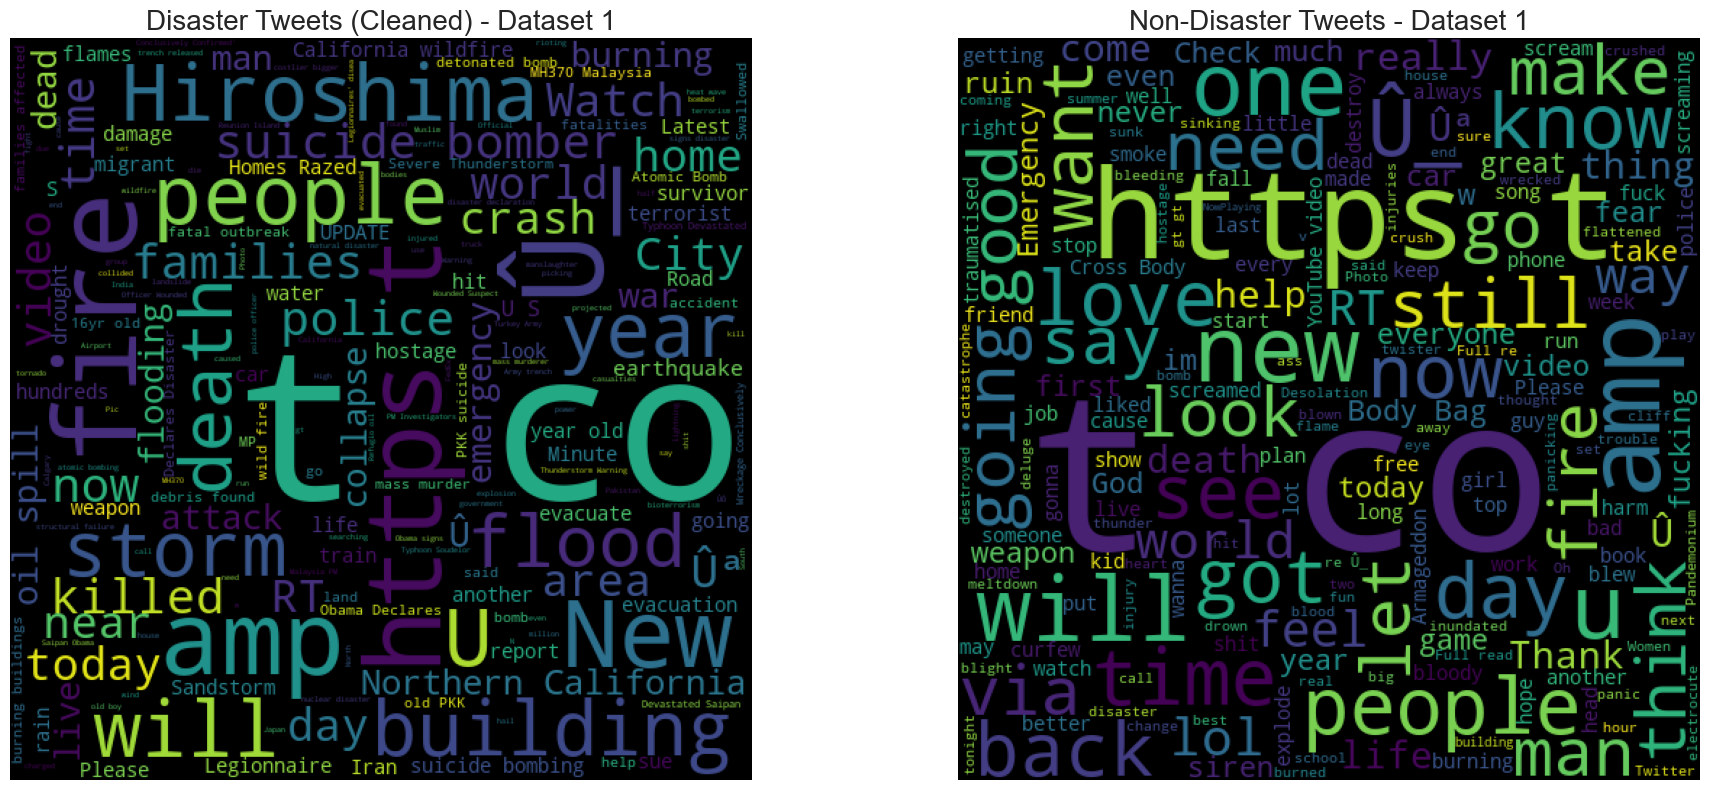

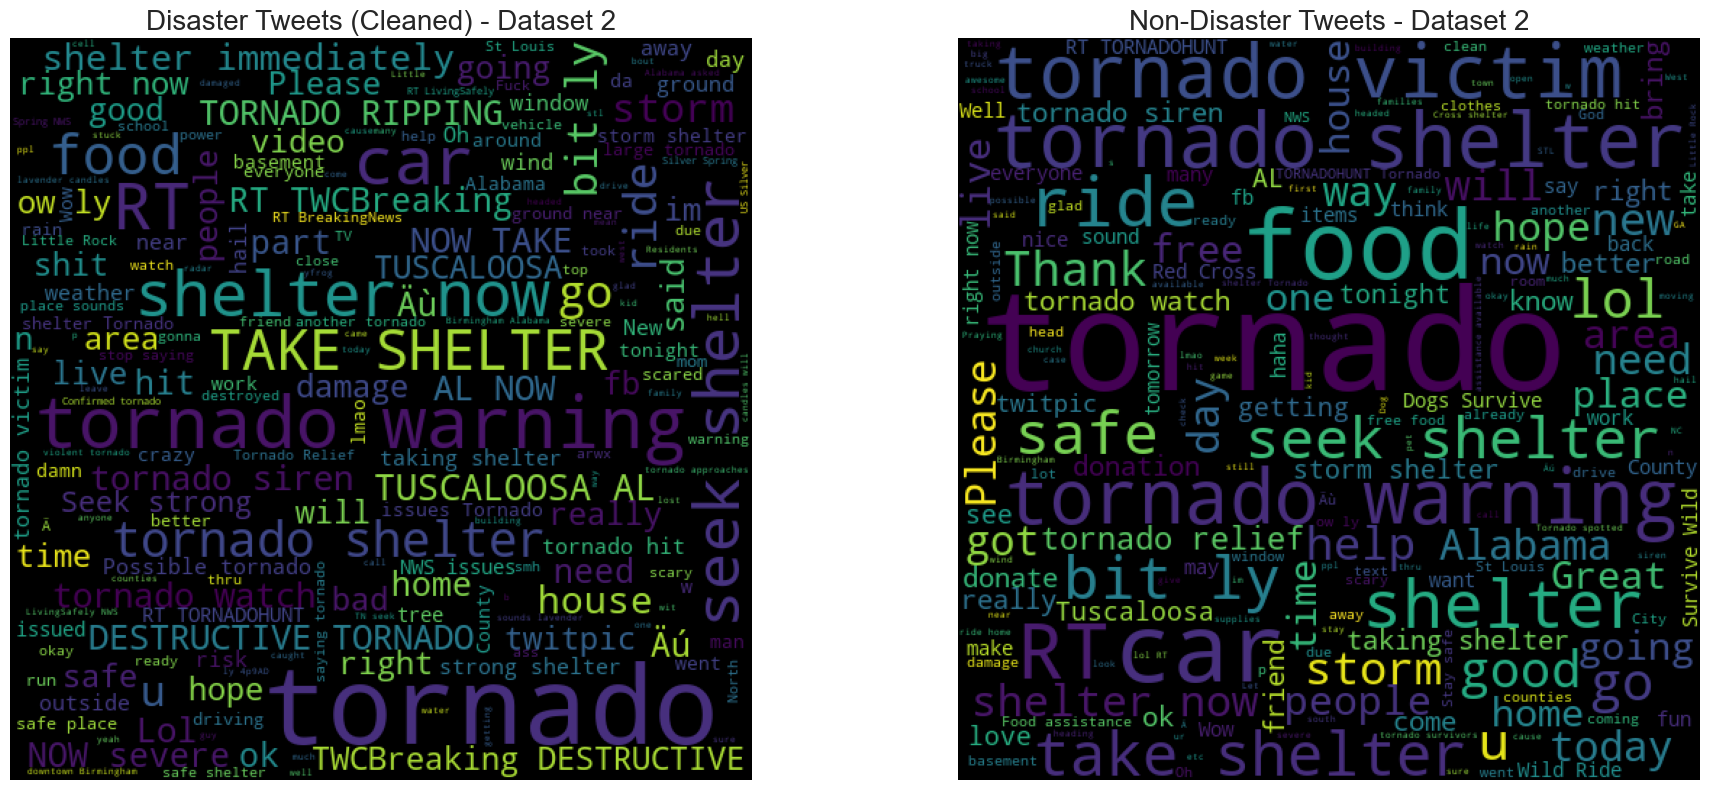

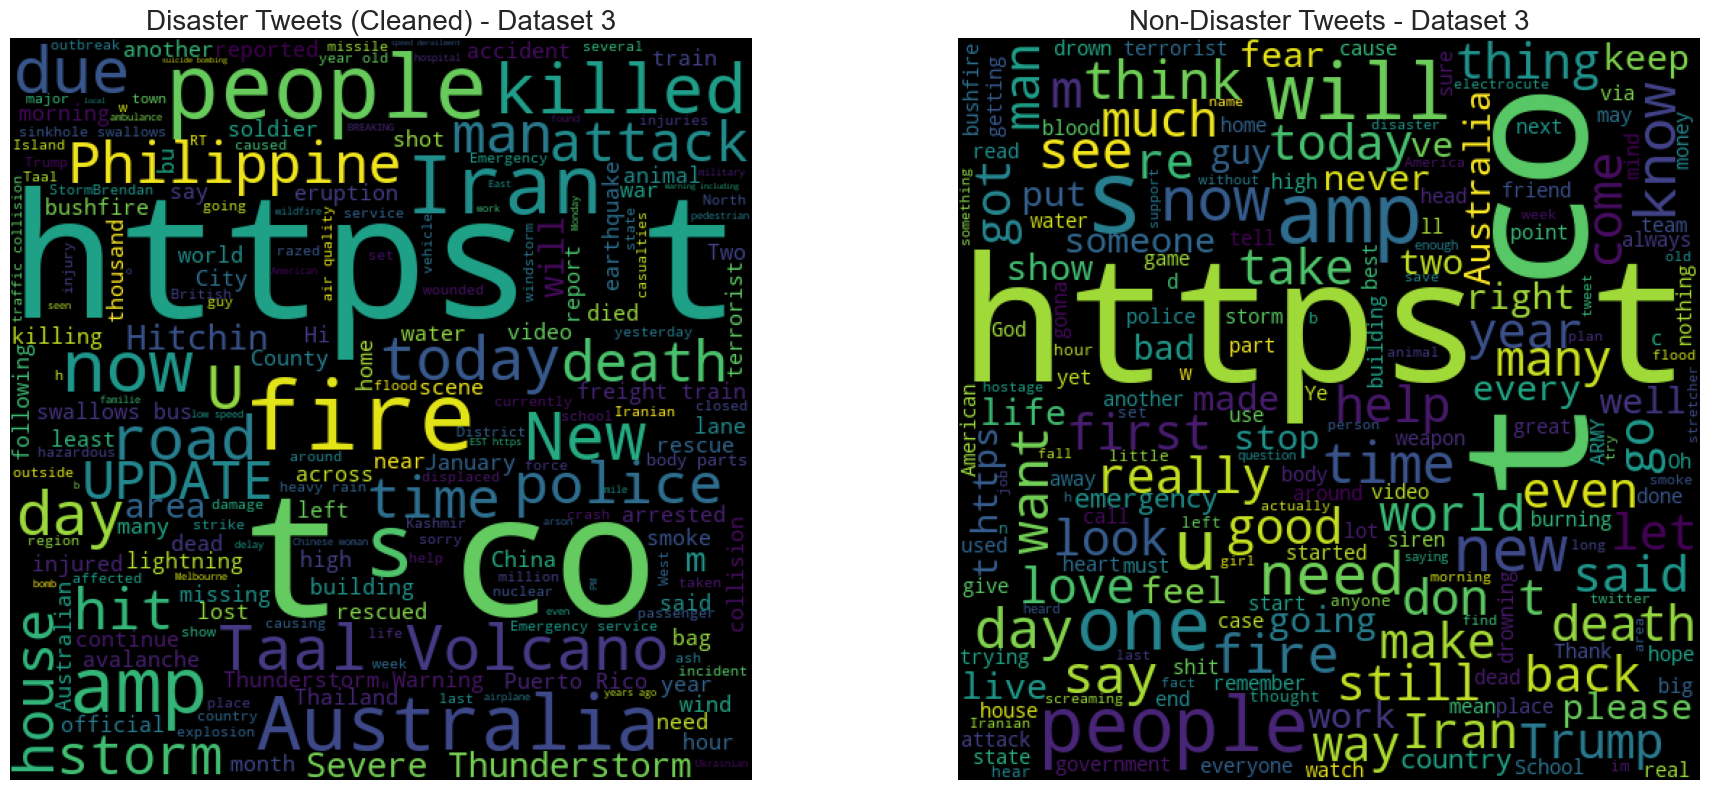

In [59]:


# Function to generate and display word cloud
def wordcloud(data, title, ax):
    words = ' '.join(data['Cleaned_text'].astype('str').tolist())
    stopwords = set(STOPWORDS)
    wc = WordCloud(stopwords=stopwords, width=512, height=512).generate(words)
    ax.imshow(wc)
    ax.axis('off')
    ax.set_title(title, fontsize=20)

# Define datasets
datasets = {
    "Dataset 1": cleaned_df_1,
    "Dataset 2": cleaned_df_2,
    "Dataset 3": cleaned_df_3
}

# Loop through each dataset and generate word clouds
for dataset_name, df in datasets.items():
    # Filter datasets for disaster and non-disaster tweets
    data_disaster = df[df['target'] == 1]
    data_non_disaster = df[df['target'] == 0]
    
    # Create subplots to display word clouds side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns
    wordcloud(data_disaster, f"Disaster Tweets (Cleaned) - {dataset_name}", axes[0])  # Display the cleaned disaster tweets word cloud
    wordcloud(data_non_disaster, f"Non-Disaster Tweets - {dataset_name}", axes[1])  # Display non-disaster tweets word cloud
    
    # Show the plots
    plt.tight_layout()
    plt.show()


In [60]:
# Saving the cleaned DataFrame to a CSV file
# Save the preprocessed datasets to CSV files
df_cleaned_1 = cleaned_df_1.copy()
df_cleaned_2 = cleaned_df_2.copy()
df_cleaned_3 = cleaned_df_3.copy()

# Save to CSV
df_cleaned_1.to_csv("Preprocessed_Dataset_1.csv", index=False)
df_cleaned_2.to_csv("Preprocessed_Dataset_2.csv", index=False)
df_cleaned_3.to_csv("Preprocessed_Dataset_3.csv", index=False)

### C. Analysing top 10 N-grams where N is 1,2,3

#### N-gram of texts are basically a set of co-occurring words within a given window and when computing the n-grams you typically move one word forward (although you can move X words forward in more advanced scenarios).

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Function to extract top N n-grams
def top_ngrams(data, n, grams):
    count_vec = CountVectorizer(ngram_range=(grams, grams)).fit(data)
    bow = count_vec.transform(data)
    add_words = bow.sum(axis=0)
    word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[:n]

# Perform N-gram analysis for all three datasets (for unigrams, bigrams, and trigrams)
def analyze_ngrams_for_datasets(datasets):
    ngram_results = {}
    for dataset_name, df in datasets.items():
        # Top 10 unigrams, bigrams, and trigrams
        common_uni = top_ngrams(df["Cleaned_text"], 10, 1)
        common_bi = top_ngrams(df["Cleaned_text"], 10, 2)
        common_tri = top_ngrams(df["Cleaned_text"], 10, 3)
        
        # Convert to DataFrames for better readability
        common_uni_df = pd.DataFrame(common_uni, columns=['word', 'freq'])
        common_bi_df = pd.DataFrame(common_bi, columns=['word', 'freq'])
        common_tri_df = pd.DataFrame(common_tri, columns=['word', 'freq'])

        # Store the results for each dataset
        ngram_results[dataset_name] = {
            "uni": common_uni_df,
            "bi": common_bi_df,
            "tri": common_tri_df
        }

    return ngram_results

# Define datasets
datasets = {
    "Dataset 1": cleaned_df_1,
    "Dataset 2": cleaned_df_2,
    "Dataset 3": cleaned_df_3
}

# Analyze n-grams for all datasets
ngram_results = analyze_ngrams_for_datasets(datasets)

# Access results for a specific dataset
# For example, to view the top 10 unigrams for Dataset 1:
print(ngram_results["Dataset 1"]["uni"])

# To save these DataFrames as CSV files:
for dataset_name, ngrams in ngram_results.items():
    ngrams["uni"].to_csv(f"{dataset_name}_uni_ngrams.csv", index=False)
    ngrams["bi"].to_csv(f"{dataset_name}_bi_ngrams.csv", index=False)
    ngrams["tri"].to_csv(f"{dataset_name}_tri_ngrams.csv", index=False)


   word  freq
0    co  4716
1  http  4286
2   the  3261
3    in  1965
4    to  1941
5    of  1817
6   and  1418
7    is   939
8   you   901
9   for   888


In [62]:


# Function to plot top 10 n-grams for a given dataset
def plot_top_ngrams_for_datasets(ngram_results, datasets):
    for dataset_name, ngrams in ngram_results.items():
        # Extract unigram, bigram, and trigram DataFrames for the dataset
        common_uni_df = ngrams["uni"]
        common_bi_df = ngrams["bi"]
        common_tri_df = ngrams["tri"]

        # Create subplots for unigrams, bigrams, and trigrams
        fig = make_subplots(
            rows=3, cols=1,
            subplot_titles=(f"Top 10 Unigrams in {dataset_name}", 
                            f"Top 10 Bigrams in {dataset_name}", 
                            f"Top 10 Trigrams in {dataset_name}")
        )
        
        # Plot unigrams
        fig.add_trace(
            go.Bar(x=common_uni_df["word"], y=common_uni_df["freq"],
                   marker=dict(color='rgba(255, 170, 59, 0.8)'),
                   marker_line=dict(color='black'), marker_line_width=1.2),
            row=1, col=1
        )
        
        # Plot bigrams
        fig.add_trace(
            go.Bar(x=common_bi_df["word"], y=common_bi_df["freq"],
                   marker=dict(color='rgba(89, 255, 147, 0.8)'),
                   marker_line=dict(color='black'), marker_line_width=1.2),
            row=2, col=1
        )
        
        # Plot trigrams
        fig.add_trace(
            go.Bar(x=common_tri_df["word"], y=common_tri_df["freq"],
                   marker=dict(color='rgba(89, 153, 255, 0.8)'),
                   marker_line=dict(color='black'), marker_line_width=1.2),
            row=3, col=1
        )
        
        # Update layout and display the plot
        fig.update_layout(
            title_text=f"Visualization of Top 10 Unigrams, Bigrams and Trigrams in {dataset_name}",
            title_x=0.5, showlegend=False,
            width=800, height=1200
        ).update_xaxes(tickangle=-90)  # Rotate x-axis labels for better readability
        
        # Show the plot
        fig.show()

# Plot n-grams for all datasets
plot_top_ngrams_for_datasets(ngram_results, datasets)
